In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Вариант 3
$y=|x|, a=-3, b=3$

<img src="images/assigment1.jpg" width="700">

### 1. Формируем выборку

$m_x=\frac{a+b}{2}=0, \sigma_x=\sqrt{\frac{(b-a)^2}{12}}=\sqrt{3}$

In [2]:
def get_x(a, b):
    return a + (b - a) * np.random.uniform()

def get_y(x):
    return np.abs(x)

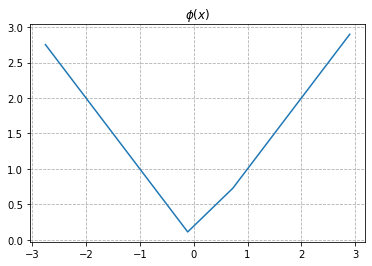

In [3]:
L, R = -3, 3
a, b = -3, 3
N = 50
#N = int(input())
x = sorted([get_x(a, b) for i in range(N)])
y = get_y(x)
plt.plot(x, y)
plt.title("$\phi(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 2. Вариационный ряд и эмпирическая функция распределения

In [4]:
unique, counts = np.unique(y, return_counts=True)
Y = dict(zip(unique, counts))
Y

{0.11083364323729494: 1,
 0.1964026041829423: 1,
 0.22097868448193214: 1,
 0.30528857387091346: 1,
 0.37627125555735486: 1,
 0.49496590772432425: 1,
 0.5187163380032218: 1,
 0.5431826101038197: 1,
 0.5913126535214888: 1,
 0.6360503703555862: 1,
 0.6988719926962128: 1,
 0.7286188777780032: 1,
 0.7329547168718902: 1,
 0.900982603115156: 1,
 0.9696251966117089: 1,
 0.9769817523701079: 1,
 0.9778096066777828: 1,
 1.0734235366968914: 1,
 1.211758917306101: 1,
 1.3097998585284216: 1,
 1.3103037778184712: 1,
 1.3291566961602914: 1,
 1.3303166942077151: 1,
 1.4688247859190016: 1,
 1.481112719810132: 1,
 1.5018075880657935: 1,
 1.5023941224382897: 1,
 1.5033109788949515: 1,
 1.5483154858293346: 1,
 1.5876038395775542: 1,
 1.6693778160947614: 1,
 1.675489306512584: 1,
 1.7056468421039535: 1,
 1.7660018121205936: 1,
 1.7956202124923157: 1,
 1.8047754312272142: 1,
 1.899033807491227: 1,
 1.909681666060422: 1,
 1.935990353245094: 1,
 2.0347684624610487: 1,
 2.0353455723866265: 1,
 2.229841871155781

In [5]:
def F_y_emp(X, x0):
    count = 0
    for i in X:
        if i <= x0:
            count += 1
    return count / len(X)

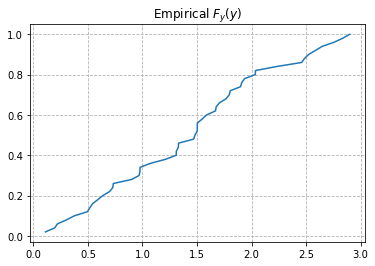

In [6]:
f_y_emp = [F_y_emp(Y, y) for y in Y.keys()]
plt.plot(list(Y.keys()), f_y_emp)
plt.title("Empirical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 3. Теоритически находим функцию распределения

<img src="images/Lab1_3.jpg" width="450">

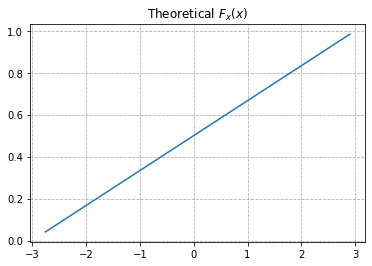

In [7]:
def F_x_ther(t):
    if t < -3:
        return 0
    elif t > 3:
        return 1
    else:
        return (t - L) / (R - L)  

plt.plot(x, [F_x_ther(x_0) for x_0 in x])
plt.title("Theoretical $F_x(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

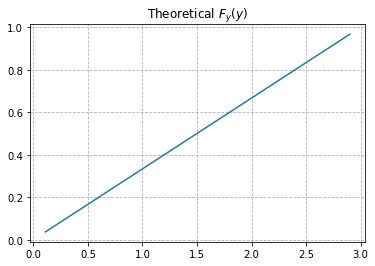

In [8]:
def F_y_ther(y):
    if y < 0:
        return 0
    else:
        return F_x_ther(y) - F_x_ther(-y)

f_y_ther = [F_y_ther(y0) for y0 in list(Y.keys())]
plt.plot(list(Y.keys()), f_y_ther)
plt.title("Theoretical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### Сравниваем теоритческую и эмпирическую

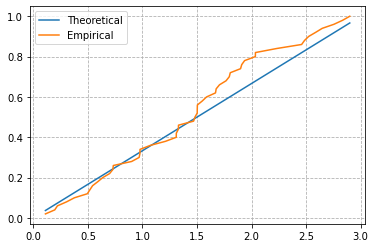

In [9]:
fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_ther, label="Theoretical")
ax.plot(list(Y.keys()), f_y_emp, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()

# lab2

<img src="images/assignment2.jpg" width="700">

## Задание 2

### 1. Гистрограмма равноинтервальным методом, полигон расределения и эмпирическая функция распредеделения

In [10]:
X = list(Y.keys())

In [11]:
if N > 100:
    M = int(4 * np.log10(N))
else:
    M = int(np.sqrt(N))

In [12]:
h = (X[-1] - X[0]) / M
A_i = [X[0] + i * h for i in range(M+1)]

In [13]:
a = A_i[:-1]
b = A_i[1:]
intervals = list(zip(a, b))
print("intervals")
intervals

intervals


[(0.11083364323729494, 0.5092728995764433),
 (0.5092728995764433, 0.9077121559155915),
 (0.9077121559155915, 1.3061514122547397),
 (1.3061514122547397, 1.704590668593888),
 (1.704590668593888, 2.103029924933036),
 (2.103029924933036, 2.5014691812721845),
 (2.5014691812721845, 2.899908437611333)]

In [14]:
m_i = np.zeros(len(intervals))
current_interval = 0
for value in X:
    if intervals[current_interval][0] < value and value < intervals[current_interval][1]:
        m_i[current_interval] += 1
        continue
    if intervals[current_interval][0] == value or value == intervals[current_interval][1]:
        m_i[current_interval] += 0.5
        continue
    current_interval += 1
m_i[0] += 0.5
m_i[-1] += 0.5
print("m_i")
m_i

m_i


array([ 6.,  7.,  4., 12.,  8.,  2.,  5.])

In [15]:
av_density = [round(value / len(X), 4) / h for value in m_i]
av_density

[0.3011751429880618,
 0.3513710001527388,
 0.20078342865870788,
 0.6023502859761236,
 0.40156685731741576,
 0.10039171432935394,
 0.25097928582338486]

In [16]:
interval_x = [intervals[0][0]]
interval_y = [0]
for i in range(len(intervals)):
    interval_x.append(intervals[i][0])
    interval_y.append(av_density[i])
    interval_x.append(intervals[i][1])
    interval_y.append(av_density[i])
interval_x.append(intervals[-1][1])
interval_y.append(0)

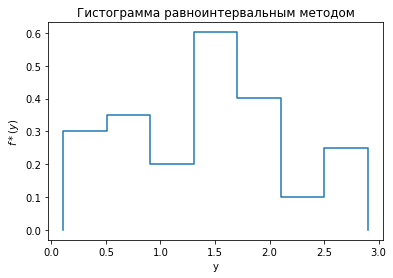

In [17]:
plt.plot(interval_x, interval_y)
plt.title("Гистограмма равноинтервальным методом")
plt.xlabel("y")
plt.ylabel("$f*(y)$")
plt.show()

# Lab3

<img src="images/assigment3.jpg" width="700">

## 1. Критерий Пирсона

In [18]:
if N != 200:
    raise ValueError()

ValueError: 

In [ ]:
intervals

In [ ]:
n_i_ = np.array([N*(F_y_ther(i[1])-F_y_ther(i[0])) for i in intervals])
print("Теоритические частоты ", n_i_)

In [ ]:
print("{\chi}^2 = ", sum((n_i_ - m_i)**2 / n_i_))

In [ ]:
print(f"число степеней свободы k = s - 1 = {len(intervals) - 1}")

In [ ]:
print(f"при alpha = 0.05 chi^2={15.5}, то есть гипотеза о равномерном распределении принимается")

## 2. Критерий Колмагорова

In [ ]:
if N != 30:
    raise ValueError()

In [ ]:
delta = max(list(map(abs, [f_y_ther[i] - f_y_emp[i] for i in range(len(f_y_emp))])))
f_y_emp.append(1)
f_y_emp.pop(0)
delta2 = max(list(map(abs, [f_y_ther[i] - f_y_emp[i] for i in range(len(f_y_emp))])))
print(f"max delta F_emp and F_theor = {max(delta, delta2)}")

In [ ]:
lambd = delta*np.sqrt(N)
print(f"lambda = {lambd}")

In [ ]:
print(f"при alpha = 0.01 lambda={1.627}, то есть гипотеза о равномерном распределении принимается")

## 3. Критерий Мизеса

In [19]:
if N != 50:
    raise ValueError()

In [23]:
S = 1/12/N
for i in range(len(X)):
    S += (F_y_ther(X[i]) - (2*i + 1)/2/N) ** 2

In [24]:
S

0.15943708327056755

In [25]:
print(f"значение статистики S = {S}")
print("Критическое значение статистики Мизеса на уровне значимости alpha=0.01 по таблице равно=0.74, , то есть гипотеза о равномерном распределении не отвергается")

значение статистики S = 0.15943708327056755
Критическое значение статистики Мизеса на уровне значимости alpha=0.01 по таблице равно=0.74, , то есть гипотеза о равномерном распределении не отвергается
